<a id='1'></a>
# <p style="color:#DC143C; font-family:Comic Sans MS ; font-size:125%; text-align:center"> 📈  <b> HackerEarth - Amazon ML Challenge </b> 📉


<a id='1'></a>
# <h2><p style="color:#191970; font-family:Comic Sans MS; font-size:150%; text-align:center"> 🍀 <b>Introduction</b> 🍀</h2>
    
<p style="font-family:Comic Sans MS; font-size:130%; color: #00008B; text-align:center;"><b>In this notebook, we will be performing an ML Challenge on HackerEarth by Amazon consisting through NLP conversion to classification problem .</b></p>

<br>
<br>

<style>
     .warning-alert {
    background-color: #00FF7F;
    border-left: 5px solid #008d62;
}
</style>

<div class="alert warning-alert" style="background-color: #87CEEB;border-left: 5px solid #191970;">
📌 <b>Competition Goal : </b>

<br>&nbsp;Amazon catalog consists of billions of products that belong to thousands of browse nodes (each browse node represents a collection of items for sale). Browse nodes are used to help customer navigate through our website and classify products to product type groups. Hence, it is important to predict the node assignment at the time of listing of the product or when the browse node information is absent.

As part of this hackathon, you will use product metadata to classify products into browse nodes. You will have access to product title, description, bullet points etc. and labels for ~3MM products to train and test your submissions. Note that there is some noise in the data - real world data looks like this!!
</div>


<div class="alert warning-alert" style="background-color: #87CEEB;border-left: 5px solid #191970;">
📌 <b>Data Description : </b>
    <b>Full Train/Test dataset details:</b>
    
<br>&nbsp; <b>Key Column</b> - PRODUCT_ID<br>
&nbsp; <b>Input features</b> - TITLE, DESCRIPTION, BULLET_POINTS, BRAND<br>
&nbsp; <b>Target column</b> - BROWSE_NODE_ID<br>
&nbsp; <b>Train dataset size</b> - 2,903,024<br>
&nbsp; <b>Number of classes in Train</b> - 9,919<br>
&nbsp; <b>Overall Test dataset size</b> - 110,775<br>
</div>


<div class="alert warning-alert" style="background-color: #87CEEB;border-left: 5px solid #191970;">
📌 <b>Important Note : </b>

<br>&nbsp;In case you are using pandas to read the csv train and test datasets, use escapechar = "\\" and quoting = csv.QUOTE_NONE options with read_csv to avoid errors during import.
</div>


<div class="alert warning-alert" style="background-color: #87CEEB;border-left: 5px solid #191970;">
📌 <b>Evaluation Criteria : </b>

<br>&nbsp;This contest uses Accuracy as the evaluation metric to measure submissions quality. Since this is a multiclass classification problem, we are interested in subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of ground truth labels.
</div>


<div class="alert warning-alert" style="background-color: #87CEEB;border-left: 5px solid #191970;">
📌 <b>Submission File : </b>

<br>&nbsp;For each PRODUCT_ID in the test data set, you are required to provide a browse node id prediction. The submission file should be a csv and contain a header followed by pairs of PRODUCT_ID, BROWSE_NODE_ID.
</div>

In [3]:
# --- CSS STYLE ---
from IPython.core.display import HTML
def css_styling():
    styles = open("../input/amazon-ml-challenge/alerts.css", "r").read()
    return HTML("<style>"+styles+"</style>")
css_styling()

<a id='1'></a>
# <p style="color:#696969; font-family:Comic Sans MS ; font-size:105%; text-align:center"> 📓📣 <b>Importing Libraries</b> 📓

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import csv
import string
import emoji
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#For nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/amazon-ml-challenge/alerts.css
/kaggle/input/amazon-ml-challenge/dataset/sample_submission.csv
/kaggle/input/amazon-ml-challenge/dataset/.lock.train.csv
/kaggle/input/amazon-ml-challenge/dataset/train.csv
/kaggle/input/amazon-ml-challenge/dataset/test.csv


<a id='1'></a>
# <p style="color:#DC143C; font-family:Comic Sans MS ; font-size:105%; text-align:center"> 📕 <b>Functions</b> 📕

In [5]:
#Removing punctuations
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, ' ')
    return text

#Removing emojis
def give_emoji_free_text(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F1F2-\U0001F1F4"  # Macau flag
        u"\U0001F1E6-\U0001F1FF"  # flags
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F620"
        u"\u200d"
        u"\u2640-\u2642"
        "]+", flags=re.UNICODE)

    text = emoji_pattern.sub(r'', text)
   
    return text


#For removing duplicates by first converting to a set and replacing it
def less_len(text):
    text = ' '.join([w for w in text.split() if len(w)>1])
    return text

def remove_duplicates(text):
    return ' '.join(list(set(text.split())))

<p style="color:#A9A9A9; font-family:Comic Sans MS ; font-size:130%; "> 📣 <b>Uploading train.csv dataset under train_df</b> 

In [6]:
train_df = pd.read_csv('../input/amazon-ml-challenge/dataset/train.csv',escapechar="\\",quoting=csv.QUOTE_NONE)
train_df.head()

,TITLE,DESCRIPTION,BULLET_POINTS,BRAND,BROWSE_NODE_ID
0,"Pete The Cat Bedtime Blues Doll, 14.5 Inch","Pete the Cat is the coolest, most popular cat ...","[Pete the Cat Bedtime Blues plush doll,Based o...",MerryMakers,0
1,"The New Yorker NYHM014 Refrigerator Magnet, 2 ...",The New Yorker Handsome Cello Wrapped Hard Mag...,[Cat In A Tea Cup by New Yorker cover artist G...,The New Yorker,1
2,The Ultimate Self-Sufficiency Handbook: A Comp...,NaN,Skyhorse Publishing,imusti,2
3,Amway Nutrilite Kids Chewable Iron Tablets (100),NaN,"[Nutrilite Kids,Chewable Iron Tablets,Quantity...",Amway,3
4,Teacher Planner Company A4 6 Lesson Academic T...,NaN,NaN,NaN,4


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2903024 entries, 0 to 2903023
Data columns (total 5 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   TITLE           object
 1   DESCRIPTION     object
 2   BULLET_POINTS   object
 3   BRAND           object
 4   BROWSE_NODE_ID  int64 
dtypes: int64(1), object(4)
memory usage: 110.7+ MB


<p style="color:#A9A9A9; font-family:Comic Sans MS ; font-size:130%; "> 📣 <b>Count of Null Values for each column</b> 

In [8]:
train_df.isnull().sum()

TITLE                 71
DESCRIPTION       723664
BULLET_POINTS     166263
BRAND              56737
BROWSE_NODE_ID         0
dtype: int64

<p style="color:#A9A9A9; font-family:Comic Sans MS ; font-size:130%; "> 📣 <b>Set of Unique values for a Categorical Points</b> 

In [9]:
print(train_df['BROWSE_NODE_ID'].nunique())
train_df['BROWSE_NODE_ID'].unique()

9919


array([      0,       1,       2, ..., 2847632, 2860317, 2893574])

In [10]:
print(train_df['BRAND'].nunique())
train_df['BRAND'].unique()

258265


array(['MerryMakers', 'The New Yorker', 'imusti', ..., 'Kaiyi',
       'Tanisha Mediways', 'TORR-TO'], dtype=object)

In [11]:
train_df.shape

(2903024, 5)

<p style="color:#A9A9A9; font-family:Comic Sans MS ; font-size:130%; "> 📣 <b>Visualization for 'na' values</b> 

<AxesSubplot:>

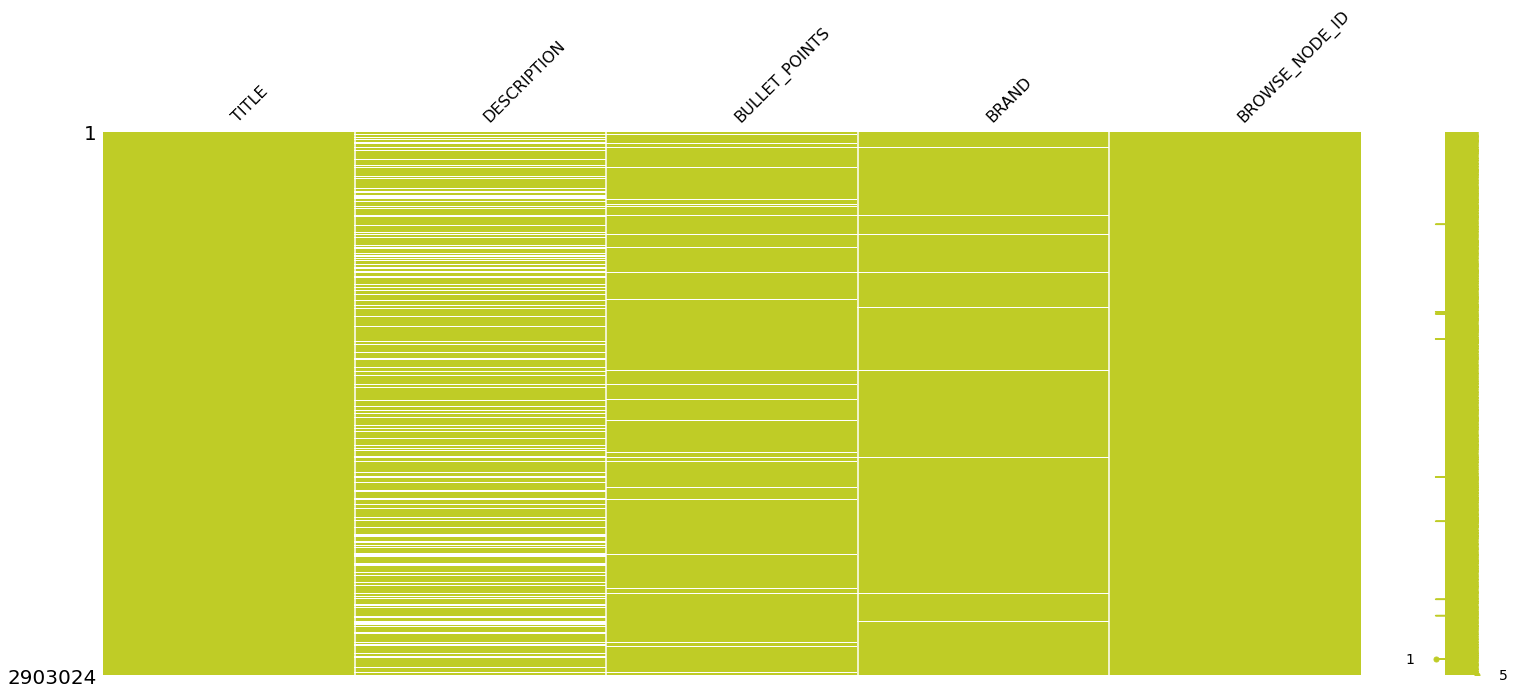

In [12]:
msno.matrix(train_df,color=(0.75, 0.80, 0.15))

<p style="color:#483D8B; font-family:Comic Sans MS ; font-size:110%; "> 🎤 <b>Now we can clearly see that there are lots of null values. As a data it represents mega point in one column or the other. So, instead of dropping all null values deleting rows which has null values in all of them.</b> 

In [13]:
train_df.dropna(axis=0, thresh=4,inplace=True)

In [14]:
train_df.isnull().sum()

TITLE                 55
DESCRIPTION       618899
BULLET_POINTS      60148
BRAND               6101
BROWSE_NODE_ID         0
dtype: int64

<p style="color:#A9A9A9; font-family:Comic Sans MS ; font-size:130%; "> 📣 <b>Replacing the individual nan values with unique kind of text</b> 

In [15]:
train_df = train_df.replace(np.nan, 'mwayza')

<AxesSubplot:>

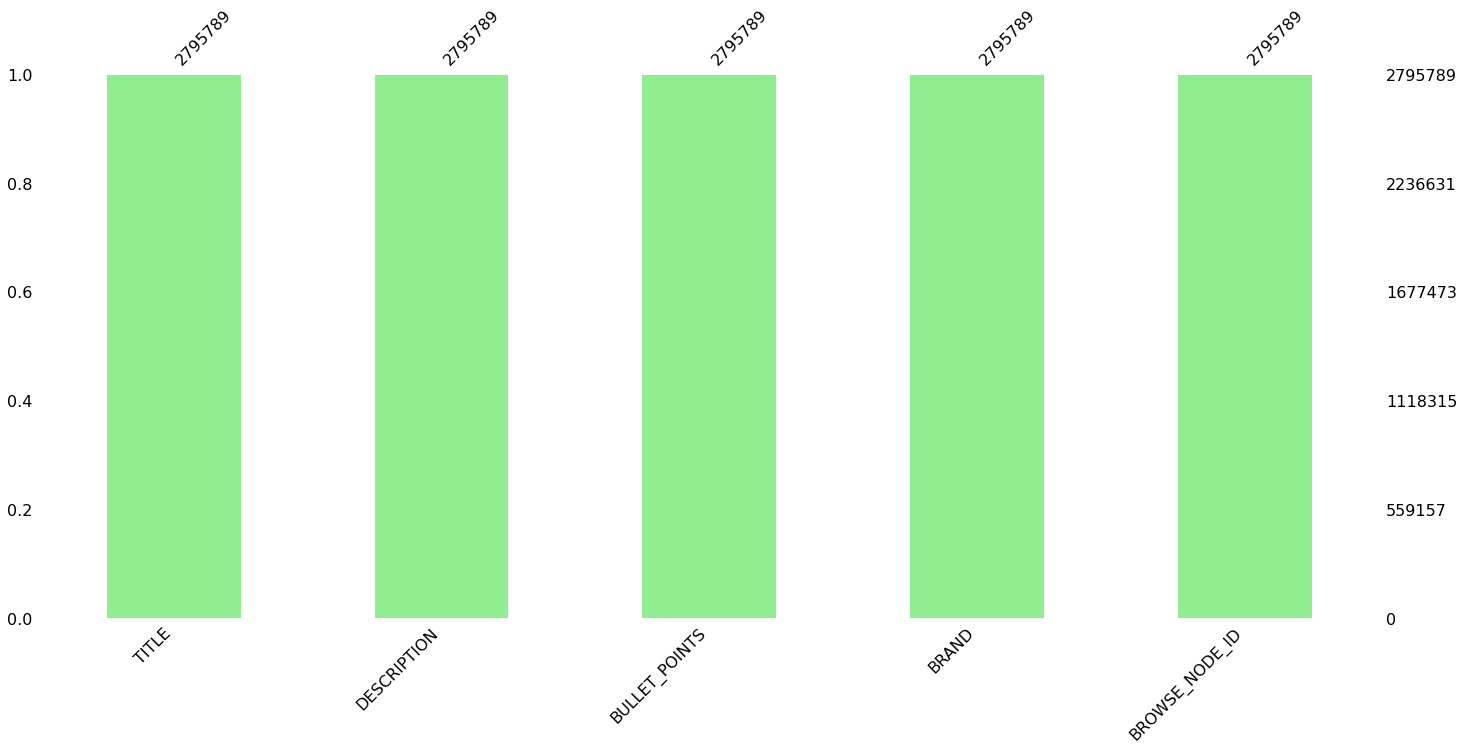

In [16]:
msno.bar(train_df,color='lightgreen')

In [17]:
kp=['TITLE', 'DESCRIPTION', 'BULLET_POINTS', 'BRAND']

<p style="color:#483D8B; font-family:Comic Sans MS ; font-size:110%; "> 🎤 <b>As the dataset contains nearly 28lakh values. So it's difficult to run all the rows alongside columns with pace. Evidently, breaking into sample to work out the methods efficiently.</b> 

In [18]:
strain_df = train_df.sample(frac =.02,random_state = 68)
strain_df.head()

,TITLE,DESCRIPTION,BULLET_POINTS,BRAND,BROWSE_NODE_ID
1354467,La Verve Cotton Print Cushion Cover 16X16,Lounging at home gets a stylish dimension cour...,"[Premium Cotton Fabric,Long Washes Durability,...",LA VERVE,912
705716,Celio Men's Solid Regular fit Polo (8904328600...,mwayza,"[Color: Red Brick,100% Cotton,Regular fit,Shor...",Celio,1213
1793796,Pantaloons Junior Boy's Slim Regular fit Trous...,mwayza,"[Color Name: Beige,100% Cotton,Buttoned closur...",Pantaloons Junior,2336
2600402,Cotson No Show Cotton Loafer Invisible Socks w...,Seller’s Note: Now No Need to Wear the Old fas...,"[Extremely discreet, invisible socks (no show ...",Cotson,9677
30314,Swan Pendant Necklace for Women (Gold) (AB-NL-...,mwayza,"[Color: Gold,Can be worn on dresses,Material: ...",Swan,805


<p style="color:#483D8B; font-family:Comic Sans MS ; font-size:110%; "> 🎤 <b>Converting the text to lower to remove all common punctuations.</b> 

In [19]:
for i in strain_df[kp]:
    strain_df[i]=strain_df[i].apply(remove_punctuations).astype(str).str.lower()

In [20]:
strain_df.head()

,TITLE,DESCRIPTION,BULLET_POINTS,BRAND,BROWSE_NODE_ID
1354467,la verve cotton print cushion cover 16x16,lounging at home gets a stylish dimension cour...,premium cotton fabric long washes durability ...,la verve,912
705716,celio men s solid regular fit polo 8904328600...,mwayza,color red brick 100 cotton regular fit shor...,celio,1213
1793796,pantaloons junior boy s slim regular fit trous...,mwayza,color name beige 100 cotton buttoned closur...,pantaloons junior,2336
2600402,cotson no show cotton loafer invisible socks w...,seller’s note now no need to wear the old fas...,extremely discreet invisible socks no show ...,cotson,9677
30314,swan pendant necklace for women gold ab nl ...,mwayza,color gold can be worn on dresses material ...,swan,805


<p style="color:#A9A9A9; font-family:Comic Sans MS ; font-size:130%; "> 📣 <b>Storing the text in stop variable to remove common words.</b> 

In [21]:
stop=stopwords.words('english')
print(sorted(stop))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", 'so', 'some',

<p style="color:#483D8B; font-family:Comic Sans MS ; font-size:110%; "> 🎤 <b>Merging all the columns into one and deleting rest of others.</b>
    
<p style="color:#483D8B; font-family:Comic Sans MS ; font-size:110%; "> 🎤 <b>Replacing mwayza with space.</b> 

In [22]:
strain_df['Combined'] = strain_df[train_df.columns[:-1]].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)
strain_df['Combined'] = strain_df['Combined'].replace('mwayza',' ')
strain_df.drop(columns=['BRAND','TITLE','DESCRIPTION','BULLET_POINTS'],inplace=True)
strain_df.reset_index(inplace=True)

In [23]:
strain_df.drop(columns=['index'],inplace=True)
strain_df.head()

,BROWSE_NODE_ID,Combined
0,912,la verve cotton print cushion cover 16x16 loun...
1,1213,celio men s solid regular fit polo 8904328600...
2,2336,pantaloons junior boy s slim regular fit trous...
3,9677,cotson no show cotton loafer invisible socks w...
4,805,swan pendant necklace for women gold ab nl ...


<p style="color:#483D8B; font-family:Comic Sans MS ; font-size:110%; "> 🎤 <b>Splitting the text string to list to implement Snowball Stemming and removing StopWords.</b>

<div class="alert warning-alert" style="background-color: #87CEEB;border-left: 5px solid #191970;">
📌 <b>Stemming : </b>

<br>&nbsp;It is the process of reducing the word to its word stem that affixes to suffixes and prefixes or to roots of words known as a lemma. In simple words stemming is reducing a word to its base word or stem in such a way that the words of similar kind lie under a common stem. For example – The words care, cared and caring lie under the same stem ‘care’. Stemming is important in natural language processing(NLP).
</div>

<div class="alert warning-alert" style="background-color: #87CEEB;border-left: 5px solid #191970;">
📌 <b>Snowball Stemmer : </b>

<br>&nbsp;It is a stemming algorithm which is also known as the Porter2 stemming algorithm as it is a better version of the Porter Stemmer since some issues of it were fixed in this stemmer.
</div>


<div class="alert warning-alert" style="background-color: #87CEEB;border-left: 5px solid #191970;">
📌 <b>Snowball Stemming Rules : </b>

<h5>ILY  -----> ILI</h5>
<h5>LY   -----> Nill</h5>
<h5>SS   -----> SS</h5>
<h5>S    -----> Nill</h5>
<h5>ED   -----> E,Nill</h5>
</div>

<div class="alert warning-alert" style="background-color: #87CEEB;border-left: 5px solid #191970;">
📌 <b>Snowball Stemming Rules : </b>
    
    
<h5>Word|----->         |Stem</h5>
<h5>cared|----->        |care</h5>
<h5>university|----->   |univers</h5>
<h5>fairly|----->       |fair</h5>
<h5>easily|----->       |easili</h5>
<h5>singing|----->      |sing</h5>
<h5>sings|----->        |sing</h5>
<h5>sung|----->         |sung</h5>
<h5>singer|----->       |singer</h5>
<h5>sportingly|----->   |sport</h5>
</div>

In [24]:
strain_df['Combined']=strain_df['Combined'].str.split()

In [25]:
#the stemmer requires a language parameter
stemmer = SnowballStemmer(language='english')

In [26]:
strain_df['Comb']=strain_df['Combined'].apply(lambda x: [stemmer.stem(item) for item in x if item not in stop])
strain_df.drop(columns=['Combined'],inplace=True)

<p style="color:#A9A9A9; font-family:Comic Sans MS ; font-size:130%; "> 📣 <b>Mapping to get back my string form.</b> 

In [27]:
strain_df['Combined']=[' '.join(map(str,l)) for l in strain_df['Comb']]
strain_df.drop(columns=['Comb'],inplace=True)
strain_df.head()

,BROWSE_NODE_ID,Combined
0,912,la verv cotton print cushion cover 16x16 loung...
1,1213,celio men solid regular fit polo 8904328600978...
2,2336,pantaloon junior boy slim regular fit trouser ...
3,9677,cotson show cotton loafer invis sock anti slip...
4,805,swan pendant necklac women gold ab nl m0432 mw...


<p style="color:#A9A9A9; font-family:Comic Sans MS ; font-size:130%; "> 📣 <b>Removing emojis from text.</b> 

In [28]:
#Removing emojis in a cell
strain_df['Combined'] = strain_df['Combined'].apply(give_emoji_free_text)

<p style="color:#A9A9A9; font-family:Comic Sans MS ; font-size:130%; "> 📣 <b>Removing duplicates by converting into a set.</b> 

In [29]:
#Removing duplicates
strain_df['Combined'] = strain_df['Combined'].apply(less_len)
strain_df['Combined'] = strain_df['Combined'].apply(remove_duplicates)

In [30]:
strain_df.head()

,BROWSE_NODE_ID,Combined
0,912,verv stylish courtesi closur heighten qualiti ...
1,1213,men solid 100 xl cotton sleev color 8904328600...
2,2336,beig pantaloon 16 color closur regular mwayza ...
3,9677,import design mani breathabl occur silicon sec...
4,805,design air stun product away color water quali...


<p style="color:#483D8B; font-family:Comic Sans MS ; font-size:110%; "> 🎤 <b>Performing Lemmatization.</b>

In [31]:
rev=""
for i in range(0,len(strain_df)):
    rev+=" "+strain_df['Combined'][i]

<p style="color:#A9A9A9; font-family:Comic Sans MS ; font-size:130%; "> 📣 <b>Splitting into new list to form list of most common words.</b> 

In [32]:
wn = WordNetLemmatizer()

lem_words_pos=[]

for word in rev.split(" "):
    word=wn.lemmatize(word)
    lem_words_pos.append(word)

<p style="color:#A9A9A9; font-family:Comic Sans MS ; font-size:130%; "> 📣 <b>Frequency Distribution Plot Graph.</b> 

In [33]:
#The frequency distribution of the words
freq_dist_pos = nltk.FreqDist(lem_words_pos)

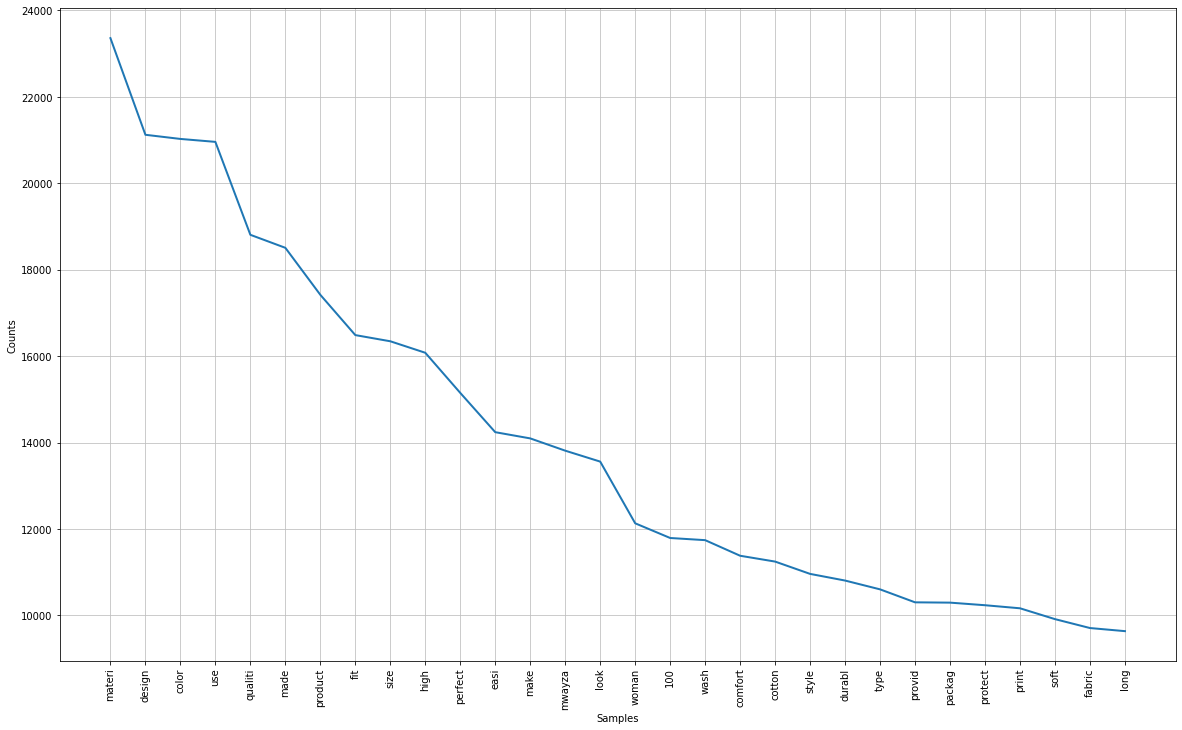

In [34]:
#Frequency Distribution Plot
plt.subplots(figsize=(20,12))
freq_dist_pos.plot(30)

In [35]:
#converting into string

res_pos=' '.join([i for i in lem_words_pos if not i.isdigit()])

<p style="color:#A9A9A9; font-family:Comic Sans MS ; font-size:130%; "> 📣 <b>List of most Bagged Words.</b> 

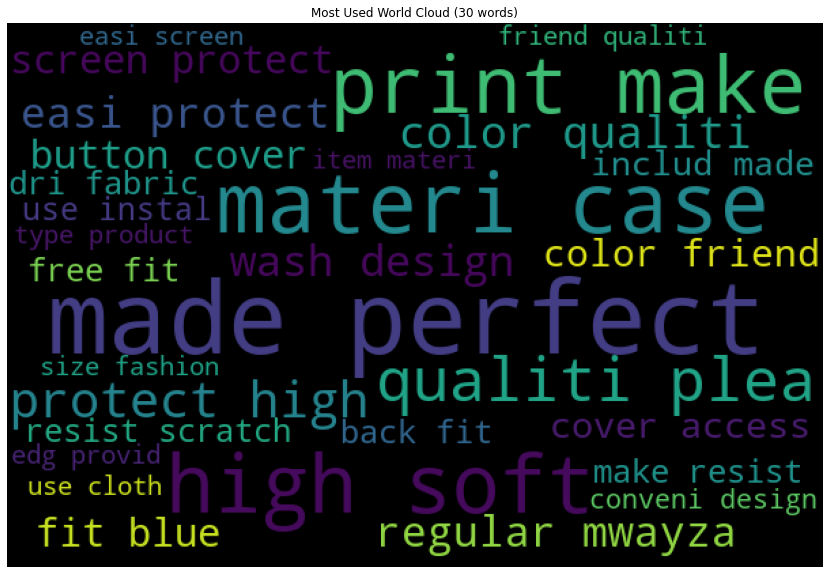

In [36]:
from wordcloud import WordCloud
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=30,
                          width=600,
                          height=400
                         ).generate(res_pos)


plt.imshow(wordcloud)
plt.title('Most Used World Cloud (30 words)')
plt.axis('off')
plt.show()

In [ ]:
test_df=pd.read_csv('../input/amazon-ml-challenge/dataset/test.csv',escapechar="\\",quoting=csv.QUOTE_NONE)
test_df.head()

In [ ]:
test_df.info()

In [ ]:
#Seems like it contains some null values
test_df.isnull().sum()

In [ ]:
print(test_df['BRAND'].nunique())
test_df['BRAND'].unique()

In [ ]:
print(test_df['PRODUCT_ID'].nunique())
test_df['PRODUCT_ID'].unique()

In [ ]:
test_df.shape